<a href="https://colab.research.google.com/github/iron59zug/YFapi/blob/master/plot_PEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
# Periodic Extremes Locator, last update 17/12/2020

#to do:
"""
1. plot Closing: done
2. find Extremes
3. sequence in Months: NEW
4. group in Periods
5. combine plots
6. ...
"""

# libs
import datetime #https://www.w3schools.com/python/python_datetime.asp
import numpy as np
import pandas as pd
# import seaborn as sns # in use?
import pandas_datareader as pdr
import matplotlib.pyplot as plt
# import plotly.graph_objects as go # in use?

#data
dsrc = 'yahoo'
stox = 'GIMB.BR'
yearspan = 9
dayrange = 5
syear = datetime.date.today().year - yearspan
smonth = datetime.date.today().month
sday = datetime.date.today().day
sdate= str(datetime.date(syear,smonth,sday)) # string!

#calculation
drange=15 # days range, +/-15 ok?
"""
if convert sdate to type date:
mdate=sdate-drange
pdate=sdate+drange
"""

#layout
fs=28; #font size
fsx=36; fsy=9 #figure size, x=width and y=heigth
# idea: fsxy= figsize=($fsx,$fsy)
plt.rc('xtick',labelsize=fs)
plt.rc('ytick',labelsize=fs)
plt.style.use('fivethirtyeight')

sdate


'2011-12-17'

In [86]:
# get data
ct = pdr.DataReader(stox, data_source=dsrc,start=sdate)
ct.rename(columns={'High':'h', 'Low':'l', 'Open':'o', 'Close':'c', 
                   'Volume':'vol', 'Adj Close':'ac'}, inplace=True)

ct[-5:]


,h,l,o,c,vol,ac
Date,,,,,,
2020-12-11,49.099998,48.549999,49.000000,49.049999,13164.0,49.049999
2020-12-14,49.450001,49.000000,49.200001,49.049999,10740.0,49.049999
2020-12-15,49.250000,48.950001,49.150002,49.049999,7972.0,49.049999
2020-12-16,49.349998,48.799999,49.200001,48.799999,8008.0,48.799999
2020-12-17,49.200001,48.900002,49.099998,49.200001,8083.0,49.200001


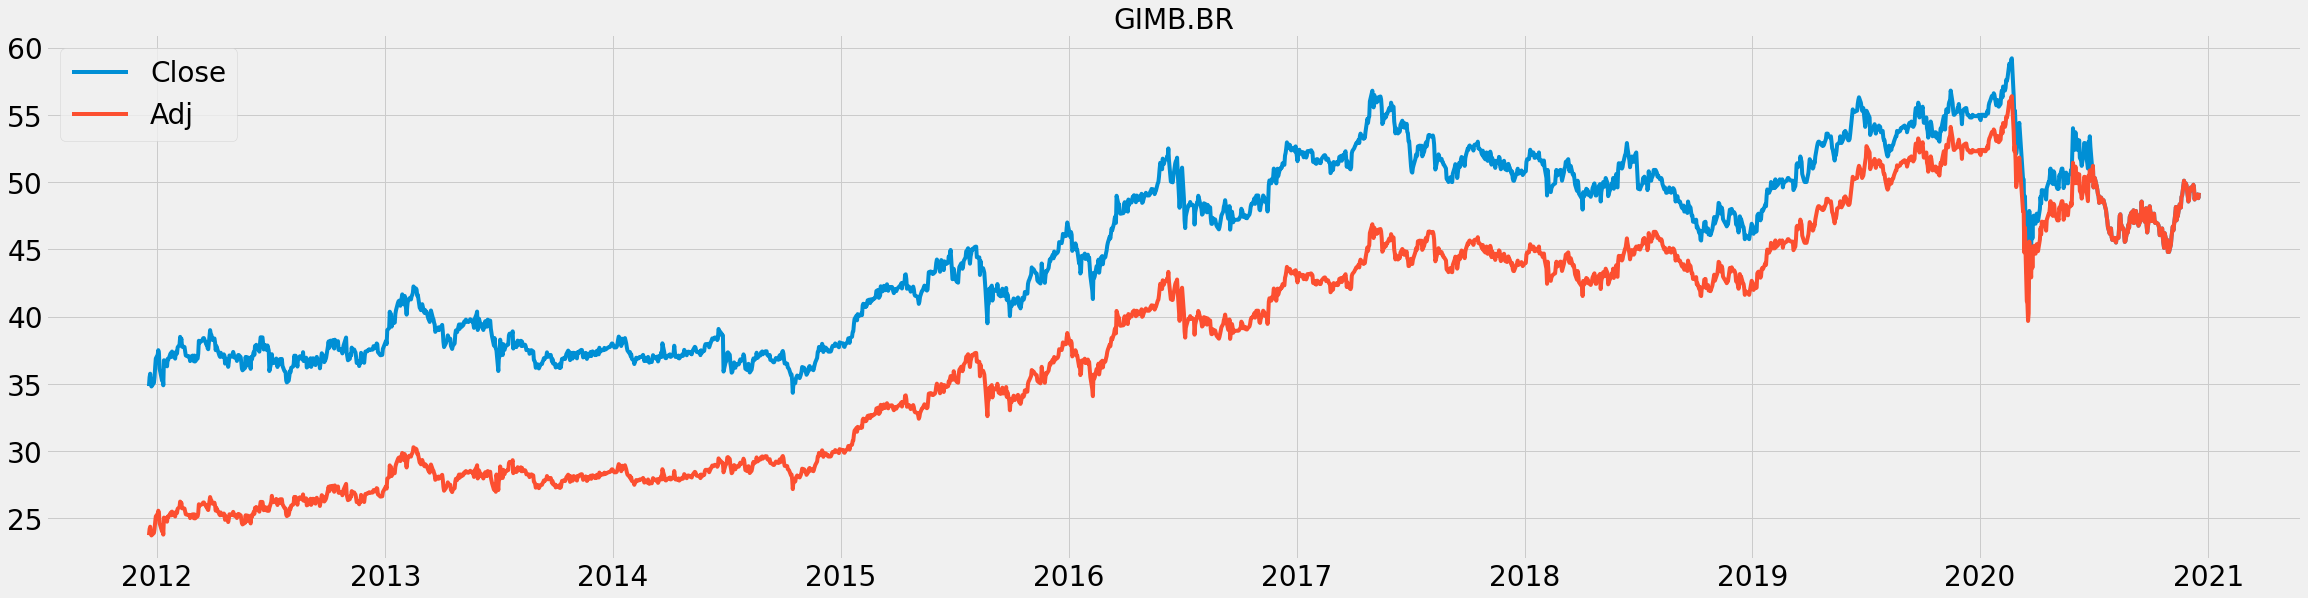

In [87]:
# plot Closing
plt.figure(figsize=(fsx, fsy))
plt.plot(ct['c'], label='Close')
plt.plot(ct['ac'], label='Adj')
plt.title(stox, fontsize=fs)
plt.legend(loc='upper left', fontsize=fs); plt.show()

In [88]:
# sequence in Months
MONTH = ct.index.month_name()
ct.drop(['h','l','o'], axis=1, inplace=True)
ct['M'] = MONTH
ct[-35:]


,c,vol,ac,M
Date,,,,
2020-10-30,44.799999,13464.0,44.799999,October
2020-11-02,45.349998,11589.0,45.349998,November
2020-11-03,45.950001,8140.0,45.950001,November
2020-11-04,46.349998,6942.0,46.349998,November
2020-11-05,46.700001,5738.0,46.700001,November
2020-11-06,46.400002,6867.0,46.400002,November
2020-11-09,47.650002,11922.0,47.650002,November
2020-11-10,48.150002,10571.0,48.150002,November
2020-11-11,47.150002,10844.0,47.150002,November


In [89]:
# find extreme

ct['max'] = 1 # use fonction ?

ct['min'] = -1 # use fonction ?

ct

,c,vol,ac,M,max,min
Date,,,,,,
2011-12-19,34.830002,15700.0,23.747271,December,1,-1
2011-12-20,35.490002,11460.0,24.197258,December,1,-1
2011-12-21,35.750000,10999.0,24.374529,December,1,-1
2011-12-22,35.200001,10250.0,23.999537,December,1,-1
2011-12-23,34.799999,9041.0,23.726814,December,1,-1
...,...,...,...,...,...,...
2020-12-11,49.049999,13164.0,49.049999,December,1,-1
2020-12-14,49.049999,10740.0,49.049999,December,1,-1
2020-12-15,49.049999,7972.0,49.049999,December,1,-1
